
<img src="../Resources/Images/Slides-Logo.png" alt="Drawing" style="width: 500px;"/>

<center> <a href='https://www.linkedin.com/in/raulm8/'>by Raul Maldonado</a></center>

# 1.0 The Overview

## 1.1 Introduction


This document is designated for my PyBay 2019 talk on an (frequentist) approach to A/B Testing, in Python.


[You can find more information in the Slide Deck for this presentation here](https://docs.google.com/presentation/d/1nr8O-hS070yhBZoc5KtMQgEdremG0-oZP0ujUnocELc/edit?usp=sharing).

Enjoy! :D

## 1.2 Concept <span style='color:red'>*</span>

A/B Testing is "[a randomized experiment of two variants, A and B.](https://en.wikipedia.org/wiki/A/B_testing)” This test quantitatively compares two variants/samples with a single "metric of choice" in evaluation if there exists a statistical significance between said groups.


For example, let's say we ran a digital ad campaign A, with a Call to Action caption 'Click here, please!' 

Also, let's say we have an alternative ad campaign B with slight modification from A, being the change in the Call to Action to "Learn more here!". 

This in mind, our goal is to decide to see if there is a difference in the campaign's Click Through Rate (CTR) performance such that we increase our engagement.

> We define $CTR := \tfrac{\text{Total Number of Successes}}{\text{Total Number of Events}}$

That is, Considering two ad Campaigns A & B, each with it's unique distinction, we want to evaluate if there is a difference, a statistical difference in fact, in CTR performance.

## 1.3 Background/History

Allen Downey once simplified A/B tests, more generally hypothesis tests, in the following steps:


![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


BUT what are Hypothesis Tests? These tests essentially the prior/less modern statistical experimental design framework of A/B tests. That being said, some people believe to see that A/B tests were borrowed/taken from the Statistics world, and labeled an edgy/cool name to distinguish iteself.

![Not Lame](../Resources/Images/not_lame_meme.PNG)
    

### 1.3.1 Stats 101?

With the above being said, some of you may recall your introduction to Statistics, particularly Hypothesis tests...

![Maths!](https://media.giphy.com/media/xY4GnaH8P3fc4/source.gif)


Statistics students are typically introduced to the following methodology and decisions when proceeding in Hypothesis tests. 

Similarly, we'll go through this decision tree (\*slaps knee\*) to determine what assumptions and calculations are needed for the provided data

![Tree](../Resources/Images/AB-Testing-Choices-Tree.png)

[Source](https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test)

As a note,

the above is just one particular decision approach for your test statistic calculation in Hypothesis Testing. It considers both the data distribution, data type, and assumption of having a population standard deviation. However, there are other types of questions besides ones related to a t-test or z-test methodology.

Considering the question in mind, data & it's type, and more , here are some examples of different tests with respective to assumptions like:

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)
________


![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Current-Scenario.png)



In the previously mentioned tree, some of the questions that lead us down that avenue may be:

1. I am comparing one sample to an observed case or two samples against one another
2. My data types for calculations are similar
3. What's the size of my dataset?
4. Do I know my standard deviation?

>  Other mentions or comparisons between Z-test & T-test, $\chi^2$ test, and other items from the above are covered in the Appendix section. 
> But **unfortunately**, we will not cover additional methodologies in this session.

# 2.0 The Format

## 2.1 Abstraction

Let's disgress from the brief background, and head back to the general overview intially seen in 1.3:

![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


When implementing the A/B testing procedure in production, we keep in mind of the following steps to ensure a resound test:

1. State your Hypothesis 
2. Statistical Assumptions
3. Define and collect control group information
4. Identify you Minimum Detectable Effect, Sample Size, and more
5. Analyze
6. Conclusion

# 3.0 Testing, Testing..1,2,3.

## 3.1 State your Hypothesis

### 3.1.1 Types of Hypothesis Declarations

In general, there are 3 types of hypotheses to consider in your tests, seen below

![Types of Test](../Resources/Images/two_tailed_test.png)

[Source](https://www.fromthegenesis.com/difference-between-one-tail-test-and-two-tail-test/)


### 3.1.2 The Statement <span style='color:red'>*</span>

We say our **Level of Significance**, $\alpha$, is set to be $\alpha = .05$. 

> This significance level $\alpha$ is the probability of rejecting the null hypothesis $H_0$, when $H_0$ is true.

> > I.e. P(Rejecting $H_0$ | $H_0$ is true)

In [1]:
alpha = 0.05

Our goal is to compare the means of two Ad groups and evaluate if there is a significant difference their average CTR performance. 

That is,

$H_0: \bar{p_1} - \bar{p_2} = 0$

> (i.e. There is no significant difference between the two campaigns)


$H_1: \bar{p_1} - \bar{p_2} \neq 0$

> (i.e. There is a significant difference between the two campaigns)

### 3.1.3 Statement Implications <span style='color:red'>*</span>

It should be noted here that we are not trying to prove that there is a significant difference. We are rather observing from the standpoint of no difference to see if one exists.

> Imagine being in a state of being leanient until proven guilty, compared to innocent until proven so. The incentive to not be within a neutral standpoint may lead to the illusion of proving or justifying the interest of yourself or another party's agenda, when that's not the case.


![Court](../Resources/Images/innocent_court.gif)

More simply,

[“Ignorance more frequently begets confidence than does knowledge: it is those who know little, not those who know much, who so positively assert that this or that problem will never be solved by science.”](https://www.goodreads.com/quotes/24141-ignorance-more-frequently-begets-confidence-than-does-knowledge-it-is)

― Charles Darwin, The Descent of Man

## 3.2 Statistical Assumptions



### 3.2.1 Existing Process

A user searches for information in Google Search. The user typically will see a list of responses for popular terms or keywords. From their inquiry, depending on what they searched for, they receive an ad at the top of the rankings as a paid recommendation related to their search.


### 3.2.2 The Scenario

Let's say we have an existing variant group A to be Google Ad Campaign promoting our portfolio in Google Search. The original variant A, the control group, will have one type of **Call to Action**, while the another variant group B, the experimental, has a different type of "Call to Action"

Each ad's activity from a user is logged either as a "Click" or an "No Click", like so

| Date     | User Email            | Action     |
|----------|-----------------------|------------|
| 1/1/1900 | fake.email@comcast.net   | No Click |
| 1/1/1900 | real.email@goog1e.com | Click      |

### 3.2.3 Basic Assumptions <span style='color:red'>*</span>

From the collected samples for this type of targed data/iformation, we assume the following conditions

* Each event is independent from one another

* Sampling is a simple random sample.

* A user either clicks or does not click (an impression) for an ad

* Application of the Central Limit Theorem for normal distribution

    * With an appropriate traffic size, the binomial-like distribution of this scenario reaches a Standard Normal (Gaussian) Distribution

* Our invariants metrics, metrics not affected by the experiment, are the numbers of users 

### 3.2.4 Segmentation

The type of users we are interested in depends on who our targeted audience is for this testing. 
(e.g. Do we simply sample form on the overall population of this test, or are we evaluating performance between a particular group? 

From our previous mention of keywords, Google Ads enables us to selectively target our ads in a bid for certain types of keywords. If we win the bid, our ad is shown related to that keyword. 

> Note: If our segmentation is too specific, we lead into the impliciation of incorrectly rejecting our existing, null, hypothesis for another--something called the **Simpson's Paradox**. This is because the more refined our segmentation is, we target a specific case or decrease our # of observations such that we lead to those results.

> Luckily, to best audit that one can identify if the culmination of different segments have the same results as the total sample 

That is, identify if segments $A_n$, where $n \in {1,2,...n}$'s overall results hold true for sample $A$

![Simpon's Paradox Example](../Resources/Images/simpons_paradox_example.png)

### 3.2.5 Experiment Goals 


Observe if our new campaign will drive a change in CTR performance.

### 3.2.6 Metric Of Choice <span style='color:red'>*</span>

We determine what is our metric of choice for our test, aligned with our existing objectives. Now, we want users to reach out to us, after reviewing our portfolio--seeing an impact for our visibility objective.

However, the tracking for that is not set up in our system. Moreover, this ad campaign is an evaluation of the effective usability of the call to action we are implementing. 

Aligned with our objective to see what ad works for usability between the two variants, we select the Click Through Rate (CTR) as our Metric of Choice.

Moreover, let the CTR proportion $p_i$ be defined as $p_i = \tfrac{x_i}{n_i}$, 

where 

$x_i$ are the successes 
& 
$n_i$ is the total count of each sample.

![Click gif](../Resources/Images/pyBay_click.gif)

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
import scipy
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt

### 3.2.7 Minimum Detectable Effect, Sample Size, and Duration


Assume the original ad's daily CTR performance was, on average, ~1%. That being said, we have a basis for what we know previous to doing anything in the test. 
> I.e. we have a basis measure to compare this baseline measure of an estimated ~1% CTR 

We would like to evaluate if there is a significant difference in the ads performance, under assumption of the baseline measure. Moreover, to consider our commitment into the consideration of a new ad campaign, regardless of if it is statistically significantly different, we have a **Minimum Dectable Effect (MDE)** for us to consider.

> An example of this is the consideration of cost of investment, change management, or risk.

The **MDE** calculation for our case is defined as 

$\text{MDE}:=t^* \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_1(1-p_2)}{n_2}}$

With the Minimum Detectable difference in mind, we need to have a few other considerations in our testing:

1. Sample Size
2. Duration

We don't have either. However, we can have the idea of what we feel is a MDE from the baseline measure. MOreover, since we have that, we can re-work the formula above to at least calcualte the sample size and estimate a time duration.


### 3.2.8 Sample Size

Assuming the two samples have an estimated equal amount of observations with an estimate of $p_1$ & $p_2$, We can compute one variant's sample size to reach MDE as


$\text{MDE}:=t^*  \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_2(1-p_2)}{n_2}} \implies t^*  \sqrt{\tfrac{p(1-p)}{n}+\tfrac{p(1-p)}{n}}\implies$

> Going forward, for a $\alpha=0.05$, $t=1.96$~2.

$n= 2 p(1-p)(\tfrac{t^* }{\text{MDE}})^2$

Remember though, we have two variants. Therefore, thet total numner of samples neeed is 

$n = n_1 + n_2 = 4 p(1-p)(\tfrac{t^* }{\text{MDE}})^2 $


For duration, we identify it based on previous traffic history.

> As an example, if I need 1,000 total observations of the two groups, and I know I have 200 unique users search per week, then we would have to wait 5 weeks for our test to run, assuming same traffic flows through.

From [this website](http://www.evanmiller.org/ab-testing/sample-size.html#!1.02;80;5;0.1;0), we find our sample size to be an estimated ~160,000 rows

In [3]:
size = 1600

### 3.3 Data Collection

Assume 3.2.7 assumptions hold true. Moreover, assume that our data collection and experiment would be run fairly from system  setup for the experiment.

* In particular,  we are using the Goodle Ads system, and is currently known for being reliable. But how do we know no performance downgrade has occurred (and all hell breaks loose on the internet with a P0 to the next available engineer #HugOps)?

A tatic used to test if a tool, like Google Ads, is being used to run experiments fairly is called **A/A testing**. What **A/A Testing** does is tests two identical versions of a page against each other. In an A/A test, the tool should report no difference in conversions between the two variant/groups. 

![A, it's A!](../Resources/Images/a_a_test_meme.png)

If there is a statistical significance in this tool, then something is afoot, and your actual implementation increases chances of having incorrect conclusions!

In [55]:
def campaign_period(startDate,endDate):
    from datetime import datetime,timedelta
    endDate_dt = datetime.strptime(endDate, '%m-%d-%Y')
    startDate_dt = datetime.strptime(startDate,'%m-%d-%Y')
    numberOfDays = (endDate_dt - startDate_dt).days
    date_list = [endDate_dt - timedelta(days=x) for x in range(numberOfDays)]
    date_list.append(startDate_dt)
    return(date_list)
    #Inspiration via  https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
    
def campaign_dataset_generator(campaignName = 'PersonDoe-Campaign2019-n', \
                               weightArray=[.5,.5], sample_size = 100, \
                               timeframe = ['7-1-2019', '8-18-2019']):
    import random
    from faker import Faker
    faker = Faker()
    actions = ['Click','No Click']
    campaignActions = random.choices(actions,\
                        weights=weightArray,\
                        k=sample_size)
    campaignTimeFrame = campaign_period(timeframe[0],timeframe[1])
    generatedScenario = [[random.choice(campaignTimeFrame), campaignName, faker.email(), i] for i in campaignActions]
    return(generatedScenario)

def campaign_df_generator(matrix,columns):
    campaignsDataset = pd.DataFrame(matrix,\
                                columns = columns)
    
    campaignsDataset.sort_values(by='Date',\
                             ascending=True, inplace = True)
    campaignsDataset = campaignsDataset.pivot_table(index=['Date','Campaign'],\
                                                columns='Action',\
                                                aggfunc='size',\
                                                fill_value=0).reset_index(drop=False)
    campaignsDataset[['Click','No Click']] = campaignsDataset[['Click','No Click']].astype(float)

    campaignsDataset.rename_axis(None,axis=1,inplace=True)
    uniqueCamp =campaignsDataset['Campaign'].unique()
    returnedObjects = []
    for element in uniqueCamp:
        returnedObjects.append(campaignsDataset[campaignsDataset['Campaign'] == element])
    return(returnedObjects)

def express_campaign_df_generator(campaignList,weightMatrix, sample_size):
    firstCamp = campaign_dataset_generator(campaignList[0],weightMatrix[0], sample_size)
    secondCamp = campaign_dataset_generator(campaignList[1],weightMatrix[1], sample_size)
    combinedCampaigns = [*firstCamp, *secondCamp]
    # https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
    
    columns = ['Date','Campaign','User_ID','Action']

    dfs = campaign_df_generator(combinedCampaigns, columns)
    return(dfs)

In [56]:
size = 1600

In [57]:
campaign1_name = 'PersonDoe-Campaign2019-1'
campaign2_name = 'PersonDoe-Campaign2019-2'

firstCampaign_ds = campaign_dataset_generator(campaignName = campaign1_name, \
                                           weightArray = [.5, .5], \
                                           sample_size = size)

secondCampaign_ds = campaign_dataset_generator(campaignName = campaign2_name, \
                                            weightArray = [.53, .47], \
                                            sample_size = size)
combinedCampaigns = [*firstCampaign_ds, *secondCampaign_ds]
# https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python

columns = ['Date','Campaign','User_ID','Action']


dfs = campaign_df_generator(combinedCampaigns, columns)

campaign1 = dfs[0]
campaign2 = dfs[1]

In [29]:
campaign1.head(3)

,Date,Campaign,Click,No Click
0,2019-07-01,PersonDoe-Campaign2019-1,20.0,14.0
2,2019-07-02,PersonDoe-Campaign2019-1,18.0,18.0
4,2019-07-03,PersonDoe-Campaign2019-1,27.0,13.0


In [30]:
campaign2.head(3)

,Date,Campaign,Click,No Click
1,2019-07-01,PersonDoe-Campaign2019-2,20.0,10.0
3,2019-07-02,PersonDoe-Campaign2019-2,18.0,19.0
5,2019-07-03,PersonDoe-Campaign2019-2,19.0,11.0


In [31]:
print(f'DataFrame Schema:\n{campaign1.columns.tolist()}')

DataFrame Schema:
['Date', 'Campaign', 'Click', 'No Click']


We observe that the dataframe contains dimension information, along with measures like Clicks and No Clicks.

However, none of these are not the CTR metric of choice.

**Question**

Recall the CTR formula from before. What was it?

**CTR** $:= \tfrac{\text{?}_1}{\text{?}_2}$

Hint: Metric of Choice

In [32]:
campaign1['CTR'] = campaign1['Click'] / (campaign1['No Click']+campaign1['Click'])

campaign2['CTR'] = campaign2['Click'] / (campaign2['No Click'] +campaign2['Click'])

The Daily distribution of the CTR calculations are as followed

In [33]:
def distribution_plot(series, series2=None, name_of_campaign = ''):

    sns.distplot( series['CTR'], hist=True, kde=True, \
        kde_kws = {'shade': True, 'linewidth': 3})

    plt.title(f'Campaign {name_of_campaign}\'s Success Distribution')

    plt.xlabel(series['CTR'].name)
    plt.show()

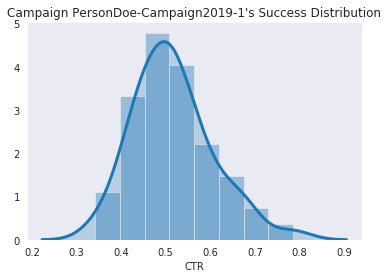

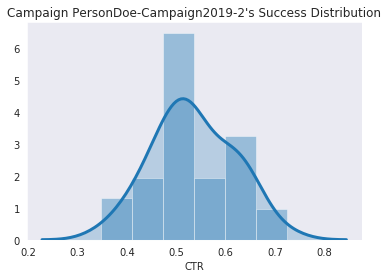

In [34]:
# First Distribution
distribution_plot(series = campaign1, name_of_campaign= campaign1_name)

# Second Distribution
distribution_plot(series = campaign2, name_of_campaign= campaign2_name)

In [35]:
# Proportion Calculations
n1 = (campaign1['No Click'].sum() + campaign1['Click'].sum())
p1 = campaign1['Click'].sum() / n1

n2 = (campaign2['No Click'].sum() + campaign2['Click'].sum())
p2 = campaign2['Click'].sum()  / n2

In [36]:
print(p1,n1)
print(p2,n2)

0.515 1600.0
0.5375 1600.0


## 3.4 Analyze The Results <span style='color:red'>*</span>

Recall that our test statistic is using the $t$ statistic defined as 

$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{\bar{p_1} (1-\bar{p_1})}{n_1}) + (\tfrac{\bar{p_2} (1-\bar{p_2})}{n_2})}$

> Note: When comparing between two groups, the notation $d:=\bar{p_1} - \bar{p_2}$ is introduced to simplify formula

Moreover, our degrees of freedom for these two variants is defined as $DoF := (n_1 + n_2 -2)$

We observe the difference $d$ = $\bar{p_1}$ & $\bar{p_2}$ equal to the following

In [49]:
def ind_t_test(group1,group2, alpha, output_bool=False):
    # Proportion Calculations
    n1 = (group1['No Click'].sum() + group1['Click'].sum())
    p1 = group1['Click'].sum() / n1

    n2 = (group2['No Click'].sum() + group2['Click'].sum())
    p2 = group2['Click'].sum()  / n2
    
    d= p2-p1
    # Standard Error of Proportions Calculations

    ## Term 1
    se1 = (p1 * (1- p1))/n1

    ## Term 2
    se2 = (p2 * (1- p2))/n2


    ## Terms being squared for final result
    standardError = np.sqrt(se1 + se2)
    tStatistic = (d - 0) / standardError

    
    # Critical T Value Test Statistic
    criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = (n1 + n2-2))


    # Confidence Interval
    confInt = [d - (criticalValue * standardError), d + (criticalValue * standardError)]

    #Two Sided P Value, P( |t| >= |t^*|)

    p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df \
                                   = (n1 + n2-2)) ) * 2.0
    if output_bool is True:
        print(f'Campaign {group1.Campaign[0]}\'s CTR: {round(p1,4)}' + f' with Standard Error {se1}.')
        print(f'Campaign {group2.Campaign[3]}\'s CTR: {round(p2,4)}' + f' with Standard Error {se2}.\n')
        print(f"Confidence Interval {confInt}")
        print(f'T Statistic: {round(tStatistic, 2)}')
        print(f'We have critical value t^* at {round(criticalValue, 2)}\nand p-value of {round(p_val, 2)}')

In [51]:
ind_t_test(campaign1,campaign2, 0.05, output_bool=True)

Campaign PersonDoe-Campaign2019-1's CTR: 0.515 with Standard Error 0.000156109375.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5375 with Standard Error 0.00015537109375.

Confidence Interval [-0.00653811962315896, 0.05153811962315889]
T Statistic: 1.27
We have critical value t^* at 1.65
and p-value of 0.2


In [37]:
d = p2-p1

print(d)

0.022499999999999964



And standard errors SE

In [38]:
# Standard Error of Proportions Calculations
## Term 1
se1 = (p1 * (1- p1))/n1

## Term 2
se2 = (p2 * (1- p2))/n2


## Terms being squared for final result
standardError = np.sqrt(se1 + se2)

In [39]:
print(f'Campaign {campaign1.Campaign[0]}\'s CTR: {round(p1,4)}' + f' with Standard Error {se1}.')
print(f'Campaign {campaign2.Campaign[3]}\'s CTR: {round(p2,4)}' + f' with Standard Error {se2}.\n')


Campaign PersonDoe-Campaign2019-1's CTR: 0.515 with Standard Error 0.000156109375.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5375 with Standard Error 0.00015537109375.



In [40]:
# T test statistic

tStatistic = (d - 0) / standardError
print(f'T Statistic: {round(tStatistic, 2)}')

T Statistic: 1.27


Thereafter, we calculate or find our referred critical test statistic $t^*$, related to our problem statement.

Lastly, a conclusion would be made for this specific test.

In [41]:
# Critical T Value Test Statistic
criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = (n1 + n2-2))


# Confidence Interval
confInt = [d - (criticalValue * standardError), d + (criticalValue * standardError)]

#Two Sided P Value, P( |t| >= |t^*|)

p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df \
                               = (n1 + n2-2)) ) * 2.0

In [42]:
print(f"Confidence Interval: {confInt}")

Confidence Interval: [-0.00653811962315896, 0.05153811962315889]


In [43]:
print(f'We have critical value t^* at {round(criticalValue, 2)}\nand p-value of {round(p_val, 2)}')

We have critical value t^* at 1.65
and p-value of 0.2


## 3.5 Conclusions <span style='color:red'>*</span>

If the calculated t-statistic $t$ > critical value $t^*$, then we reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_1$. 
> Equivalently, if $p < \alpha$, then we  reject the null hypothesis $H_0$. 

If not, then we fail to reject the null hypothesis $H_0$. 

In [44]:
if p_val < alpha:
    print("We reject the Null Hypothesis H_0")
    print("Therefore, we can say that there is a statistical difference between the two campaigns.")

else:
    print("We fail to reject the Null Hypothesis H_0")
    print("Therefore, we can say that there is no statistical significant difference between the two campaigns.")

We fail to reject the Null Hypothesis H_0
Therefore, we can say that there is no statistical significant difference between the two campaigns.


p value discussion

practical significance

 you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. In other words, is it large enough to care about?

Note: it false because conditions other than large effect sizes can produce tiny p-values.

Here’s how small effect sizes can still produce tiny p-values:

You have a very large sample size. As the sample size increases, the hypothesis test gains greater statistical power to detect small effects. With a large enough sample size, the hypothesis test can detect an effect that is so miniscule that it is meaningless in a practical sense.

The sample variability is very low. When your sample data have low variability, hypothesis tests can produce more precise estimates of the population’s effect. This precision allows the test to detect tiny effects.

Statistical significance indicates only that you have sufficient evidence to conclude that an effect exists. It is a mathematical definition that does not know anything about the subject area and what constitutes an important effect.

In [64]:
## Demo on P-Hacking
# for i in range(3):
#     expressCamp1, expressCamp2 = express_campaign_df_generator([campaign1_name,campaign2_name], \
#                               weightMatrix = [[.5, .5],[.53, .47]],\
#                              sample_size = 1400)
#     ind_t_test(expressCamp1,expressCamp2, 0.05, output_bool=True)

Campaign PersonDoe-Campaign2019-1's CTR: 0.5 with Standard Error 0.00017857142857142857.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5436 with Standard Error 0.00017721537900874636.

Confidence Interval [0.012535410853148295, 0.07460744628970889]
T Statistic: 2.31
We have critical value t^* at 1.65
and p-value of 0.02
Campaign PersonDoe-Campaign2019-1's CTR: 0.4864 with Standard Error 0.00017843986880466473.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5236 with Standard Error 0.00017817456268221575.

Confidence Interval [0.006070762721637722, 0.06821495156407656]
T Statistic: 1.97
We have critical value t^* at 1.65
and p-value of 0.05
Campaign PersonDoe-Campaign2019-1's CTR: 0.5014 with Standard Error 0.00017856997084548105.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5371 with Standard Error 0.0001775860058309038.

Confidence Interval [0.004662170479480709, 0.06676640094909068]
T Statistic: 1.89
We have critical value t^* at 1.65
and p-value of 0.06


# 4.0 +More! [Optional]

## 4.1 The Chai -err umm....Chi-Squared Test

This test can equivalently be done by using another test framework & calculation. You can find the details of this example [in the Appendix section](#appendix-chi-square-test).

In [15]:
# df = [ [campaign1_Df['Clicks'].sum(), campaign1_Df['Impressions'].sum()- campaign1_Df['Clicks'].sum(),campaign1_Df['Impressions'].sum()], \
#       [campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum() -campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum()] ]

In [16]:
# from scipy import stats

# twoByTwo_df = pd.DataFrame(df,index=['Campaign 1', 'Campaign 2'] ,columns=['Clicks','No Clicks','Impressions'])
# # stats.chi2_contingency(twoByTwo_df)

In [17]:
# twoByTwo_df

In [18]:
# expectedClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['Clicks'].sum() 

# expectedNonClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['No Clicks'].sum() 

# expectedDf = pd.concat([expectedClicksSeries,expectedNonClicksSeries],axis=1)

In [19]:
# expectedDf.columns =['Clicks', 'No Clicks']
# expectedDf


In [20]:
# chiSquareStatistic = ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

In [21]:
# ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

In [22]:
# chiSquareStat, pVal, dof, expected = stats.chi2_contingency(twoByTwo_df)

# print('Expected Table: \n',expected,'\n')

# # interpret test-statistic
# prob = 0.95
# alpha = 1.0 - prob

# criticalVal = stats.chi2.ppf(prob, dof)

# print(f'Degrees of Freedom: {dof}\n')
# print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, criticalVal, alpha))

# print('Decision:')
# print(f'For significance level {round(alpha,2)},\n')
# if abs(chiSquareStat) >= criticalVal:
#     print('We reject the Null Hypothesis, H_0\n')
#     print(f'for p = {prob} >= {criticalVal}.')
# else:
#     print('We fail to reject the Null Hypothesis, H_0\n')
#     print(f'for p = {prob} < {criticalVal}.')

    
# ### Alternatively can say:    
# # if p <= alpha:
# #     print('We reject the Null Hypothesis, H_0.')
# #     print(f'for p = {p} >= {alpha}.')

# # else:
# #     print('We fail to reject the Null Hypothesis, H_0.')
# #     print(f'for p = {p} < {alpha}.')

# 5.0 Remarks & Random Notes

Prerequisite knowledge: Central Limit Theorem
The Central Limit Theorem (CLT) implies a sample of independent random variables, their sums tends towards to a normal distribution even if the original variables themselves aren't normally distributed, also the sample mean tends towards to a normal distribution (sum and mean are equivalent).



## 5.1 Chi Square Testing

* Chi-Square Goodness of Fit Test
    * $\chi^2$ Test that determines if a sample data matches a population. For more details on this type, see: Goodness of Fit Test.

* Chi-Square Test for Independence

    * $\chi^2$ Test that compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    
> Note: Chi Square is cool because it works with more than 2 samples

> Note: If we have a  small sample size, then Chi Square may have more errors, and thus one would have to work with a Fischer's Exact Test

## 5.2 Testing considerations

* Ethics
    * Risk, Benefits, and Privacy for participants
    
* Hyperfocusing on specific metric selections, rather than macro ones. (e.g. Wanting to increase Revenue is a goal, but what is the specific issue that you are tackling, to downstream speaking increase that)

* If you test on a smaller sample, realize test will have lower power, and thus is constrainted for detecting larger impacts 

* Keep in mind
    * when is the best time to run the experiment (e.g. running on Holidays, weekends?)
    * If there is a new change, there may be a learning effect, and then behaviour can become stable again (leading to a false positive)
        * Recommendation to avoid a Learning Effect is running experiment on smaller group of users, for longer period of time.
* Mind the possibility of the Simpson's Paradox
    * Segmentation of groups in thus reducing sampling creates significance, but not from other groups from data before segmentation. Best way to validate this doesn't exist is to do the same test for combined groups.
        * E.g. Splitting between new users and existing users
* $\alpha$ percent of the time, you'll reach significance due to chance 
    * You are running a tests with 20 variants, and you test each hypothesis separately:
        * P(one significant result) = 1−P(no significant results) 
        * P(one significant result) = 1−(1−0.05)^20 = 0.64
    * Avoid this by the Bonferroni Correction
    
* Novelty Effect or Change Aversion: cohort analysis may be helpful.



> Note: Individuals will proceed to perform an A/B test from code. Though note there exists **proprietary** A/B testing solutions like [Optimizely](https://www.optimizely.com/), [VWO](https://vwo.com/campaign/get-started/?utm_source=google&utm_medium=paid&utm_campaign=mof_search_brand_vwo_brand&utm_content=308583203468&utm_term=vwo&gclid=Cj0KCQjwv8nqBRDGARIsAHfR9wD7uaDnZRUDFKrXDtcn8jCv4v_dNhSRxzWsddKQAo0WuREO4phZ1PQaAopsEALw_wcB), [AB Tasty](https://www.abtasty.com/), [Google Optimize](https://optimize.google.com/optimize/home/), etc.

<a id='appendix'></a>

## 5.3 Appendix

### P-Hacking


### Tukey's Range Test (Optional) [WIP]

### 5.3.1 Data Collection Section

#### 5.3.1.1 Uniform Distribution

In [20]:
n = 400
uniformDist = np.random.rand(n)
# [0.0, 1.0) distribution set

In [27]:
print(uniformDist[:4])

[0.03403842 0.84005661 0.5416037  0.15702651]


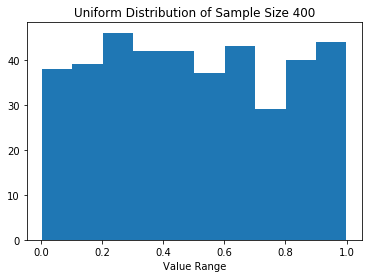

In [23]:
plt.hist(uniformDist)
plt.title(f'Uniform Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.1.2 Standard Normal Distribution

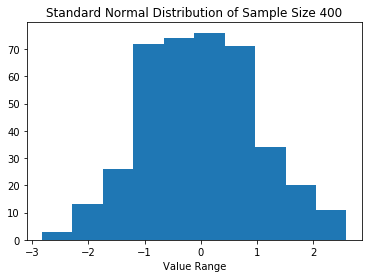

In [26]:
normalDist = np.random.randn(n)
# Mean 0 and Variance 1 Distribution Set
print(uniformDist[:4])

plt.hist(normalDist)
plt.title(f'Standard Normal Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.2.2 Proportion: Normal Approximation

For large values of n, the distributions of the count $X$ and the sample proportion are approximately normal due to the Central Limit Theorem, as it approximates the normal distribution like 

$\bar{X}$ ~ $N(\tfrac{np}{p},\tfrac{np(1-p)}{n^2}) = N(n, \tfrac{p(1-p)}{n})$

<a id='appendix-chi-square-test'></a>

### Chi Square Test (Optional)
Equivalently, we can use a similiar process and test statistic in evaluation of proportions. 

Let us have a 2x2 frequency table where columns are two groups of respondents and rows are the two responses "successes" and "failures". 


|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | X_1    | Y_1         | X_1 + Y_1  | 
| Test 2 | X_2    | Y_2         | X_2 + Y_2   |
| Total  | x      | x           | x   | 

Then we can provide an equivalent A/B test for the upcoming CTR metric as followed:


State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$ (Independent)

$H_1: \bar{p_1} - \bar{p_2} \neq 0$ (Not Independent)

DF = $(x_1 - 1) * (x_2 - 1)$

Test Statistic:

$\chi^2= \tfrac{(O-E)^2}{E}$, 

where $O$ are the Observed values and $E$ are the Expected values.

> Note:
Expected values are calculated as such:
> For the top left region, it would be $\tfrac{( x_{Clicks} * (X_1 + Y_1)}{x_T }$

|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | $Y_1$    | $Y_1$         | $X_1 + Y_1$  | 
| Test 2 | $X_2 $   | $Y_2 $        | $X_2 + Y_2 $  |
| Total  | $x_{Clicks}$      | $x_{No Clicks}$        | $x_T$   | 

### 5.3.3 Data Collection Section

#### 5.3.3.1 Basesline Conversion Rate

Known in conversion-related AB testing calcilatsion, **baseline conversion rate** is the current conversion rate for the variant you’re testing.

> Conversion rate is the number of conversions divided by the total number of visitors.

## Definitions & Terminology

* Null Hypothesis


* Alternative Hypthesis


![Null Hypothesis Comment](../Resources/Images/null_hypothesis_xkcd.png)

[Source](https://xkcd.com/892/)

* "Test of Proportion" is also seen as the 2-sample independent t-test

* Standard Deviation

* Mean 

* Variance

* Bi-modal

* Signifiance

* P-value

* Chi = $\chi^2$

* Central Limit Theorem: Sample of independent random variables from an unknown population that is non-normal. This sample's mean tends towards to a normal distribution, as the size $n$ becomes larger

* Normal

* Standard Normal

# 6.0 Resources

* https://byrony.github.io/understanding-ab-testing-and-statistics-behind.html
    
* https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/

* https://docs.google.com/presentation/d/1k_zR5IkHaIpA6fbTDoa48Gh_LodY7Mjbf56zLro5Uus/edit#slide=id.g31d3c8507d_0_177
        
        
* https://stats.stackexchange.com/questions/76875/what-is-the-difference-between-mcnemars-test-and-the-chi-squared-test-and-how/141450#141450